In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
data = data.drop("Id",axis=1)

In [6]:
data.shape

(150, 5)

In [7]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

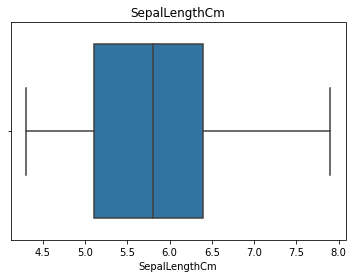

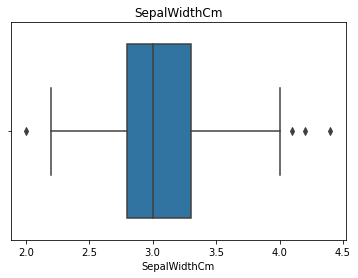

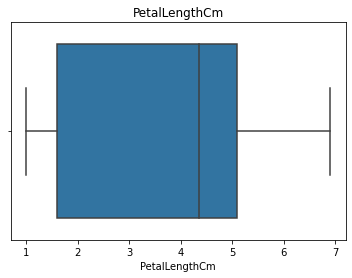

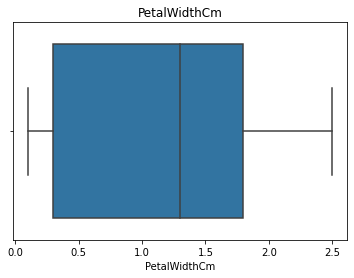

In [11]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [12]:
    descr = data['SepalWidthCm'].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data['SepalWidthCm'][data['SepalWidthCm']>upper_limit] = upper_limit
    data['SepalWidthCm'][data['SepalWidthCm']<lower_limit] = lower_limit

<ipython-input-12-7c774c127f6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SepalWidthCm'][data['SepalWidthCm']>upper_limit] = upper_limit
<ipython-input-12-7c774c127f6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SepalWidthCm'][data['SepalWidthCm']<lower_limit] = lower_limit


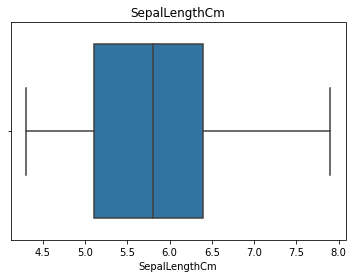

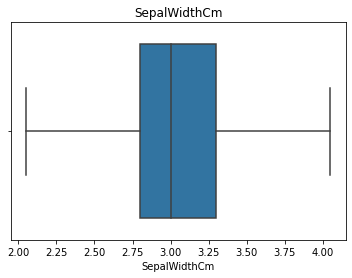

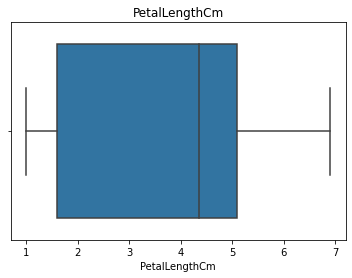

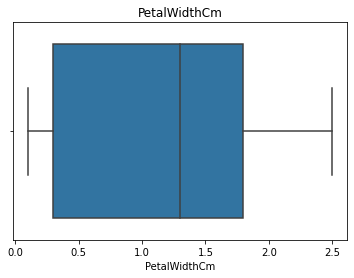

In [13]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [14]:
y = data['Species']
X = data.drop("Species",axis=1)

In [15]:
X.shape

(150, 4)

In [16]:
y.shape

(150,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50)

In [57]:
X_train.shape

(100, 4)

In [58]:
y_train.shape

(100,)

In [59]:
X_test.shape

(50, 4)

In [60]:
y_test.shape

(50,)

In [61]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [62]:
classifier.fit(X_train,y_train)

/home/sumith/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
ypred=classifier.predict(X_test)

In [64]:
ypred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [65]:
classifier.score(X_train,y_train)

0.97

In [66]:
classifier.score(X_test,y_test)

0.98

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,ypred)

0.98

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 16]])

In [71]:
accuracy= (17+16+16)/(17+16+16+1)
accuracy

0.98